# One hot encoding

In [1]:
import keras

Using TensorFlow backend.


## Word level

In [2]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']


#Creating a dict where each word is associated to a number
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
        
        
#One hot enconding        
max_length = 10
results = np.zeros(shape=(len(samples),
max_length,
max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [3]:
print(token_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [4]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


Result is a list of lists ( one list for each sentence) containing one vecotr for each word which has the size of the total number of word ) 

## Character level

In [5]:
import string

#Creating the dict from ASCII
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50

#ONE HOT ENCODING
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [6]:
print(token_index)

{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: '8', 10: '9', 11: 'a', 12: 'b', 13: 'c', 14: 'd', 15: 'e', 16: 'f', 17: 'g', 18: 'h', 19: 'i', 20: 'j', 21: 'k', 22: 'l', 23: 'm', 24: 'n', 25: 'o', 26: 'p', 27: 'q', 28: 'r', 29: 's', 30: 't', 31: 'u', 32: 'v', 33: 'w', 34: 'x', 35: 'y', 36: 'z', 37: 'A', 38: 'B', 39: 'C', 40: 'D', 41: 'E', 42: 'F', 43: 'G', 44: 'H', 45: 'I', 46: 'J', 47: 'K', 48: 'L', 49: 'M', 50: 'N', 51: 'O', 52: 'P', 53: 'Q', 54: 'R', 55: 'S', 56: 'T', 57: 'U', 58: 'V', 59: 'W', 60: 'X', 61: 'Y', 62: 'Z', 63: '!', 64: '"', 65: '#', 66: '$', 67: '%', 68: '&', 69: "'", 70: '(', 71: ')', 72: '*', 73: '+', 74: ',', 75: '-', 76: '.', 77: '/', 78: ':', 79: ';', 80: '<', 81: '=', 82: '>', 83: '?', 84: '@', 85: '[', 86: '\\', 87: ']', 88: '^', 89: '_', 90: '`', 91: '{', 92: '|', 93: '}', 94: '~', 95: ' ', 96: '\t', 97: '\n', 98: '\r', 99: '\x0b', 100: '\x0c'}


## With Keras

In [7]:
from keras.preprocessing.text import Tokenizer

#Creating of the tokenizer (configuration to count only the 1000 most important words)
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

#Turn string into an integer sequence
sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [8]:
from keras import backend as K
K.set_session

<function keras.backend.tensorflow_backend.set_session(session)>

In [9]:
print(word_index)

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [10]:
print(one_hot_results)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


The result isn't exactly the same, keras presents a each sentence as a unique vector where each bit corresponds to a word. 

## Hashing Trick

In [11]:
dimensionality = 1000 #Size of a vector representing a word
max_length = 10


results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality #random hashing between 0 and 1000
        results[i, j, index] = 1.

In [12]:
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


If you have more than 1000 different words, be careful because it will create collision (two different words will have the same hash) so two word will be associated with the same one hot encoding

# WORD EMBEDDINGS

In [13]:
from keras.layers import Embedding


# 100 : The number of possible tokens
# 64 :  The dimensionality of the embedding
embedding_layer = Embedding(1000, 64)


## Preprocess

In [14]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)


17465344/17464789 [==============================] - 34s 2us/step


In [15]:
print(x_train)

[[  65   16   38 ...   19  178   32]
 [  23    4 1690 ...   16  145   95]
 [1352   13  191 ...    7  129  113]
 ...
 [  11 1818 7561 ...    4 3586    2]
 [  92  401  728 ...   12    9   23]
 [ 764   40    4 ...  204  131    9]]


## EMBEDDING NN

In this part we will first do an embedding on 8 dimensional vectors, and test its accuracy

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

# 10 000 (len of the vocabulary)
# 8 size of the vector resulting from the word embeddings
# Max len is the number of words analyzed in each phrase (the first 20 here)
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 185us/step - loss: 0.6625 - acc: 0.6401 - val_loss: 0.6066 - val_acc: 0.7048
Epoch 2/10
20000/20000 [==============================] - 3s 159us/step - loss: 0.5346 - acc: 0.75

## PRETRAINED WORD EMBEDDINGS

In [18]:
ls

 Le volume dans le lecteur C s'appelle Windows
 Le num‚ro de s‚rie du volume est 28E6-BFFF

 R‚pertoire de C:\Users\berte\Desktop\M2_AIC\NLP\TP4

20/10/2019  12:43    <DIR>          .
20/10/2019  12:43    <DIR>          ..
20/10/2019  12:01    <DIR>          .ipynb_checkpoints
20/10/2019  12:43    <DIR>          aclImdb
18/10/2019  09:56        11ÿ442ÿ209 Chollet-Deep Learning with Python-Manning Publications-17.pdf
20/10/2019  12:40            18ÿ214 DEEP_LEARNING_NLP.ipynb
18/10/2019  09:56           116ÿ470 Text_Classification.ipynb
               3 fichier(s)       11ÿ576ÿ893 octets
               4 R‚p(s)  145ÿ362ÿ128ÿ896 octets libres


In [21]:
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname) ,encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [23]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [33]:
len(labels)

25000

#### TOKENIZING THE DATA

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


# Importing the pre embedding sequences

In [38]:
glove_dir = './'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt') , encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


The aim of this cell is to construct a matrix that we'll use in the embedding layer in our neural network.
This matrix will map the word and its index (we defined from the tokenization above) to the corresponding embedding

In [41]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

If we check the first row (non zero row) we should have the embedding corresponding to the word_index =1 which is the.
So let's check this.

In [49]:
embedding_matrix[1] - embeddings_index['the']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Defining a model

In [50]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### DEFINING THE EMBEDDING IN THE FIRST LAYER

In this cell we set the first weight of the embedding with the pre trained embedding, and we freeze this weights (the y can't be updated during the training.

In [51]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [52]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 10ms/step - loss: 2.1120 - acc: 0.5000 - val_loss: 0.6883 - val_acc: 0.5394
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6165 - acc: 0.6800 - val_loss: 0.7420 - val_acc: 0.5148
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5014 - acc: 0.7450 - val_loss: 0.8326 - val_acc: 0.5067
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3382 - acc: 0.8450 - val_loss: 0.7576 - val_acc: 0.5306
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3024 - acc: 0.8700 - val_loss: 0.6845 - val_acc: 0.5810
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.1728 - acc: 0.9700 - val_loss: 1.0931 - val_acc: 0.5068
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1167 - acc: 0.9800 - val_loss: 0.8579 - val_acc: 0.5356
Epoch 8/10
200/200 [=======

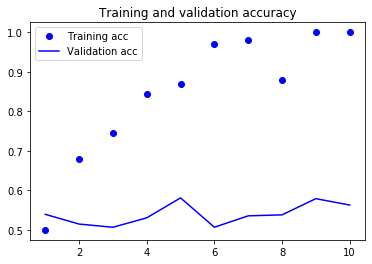

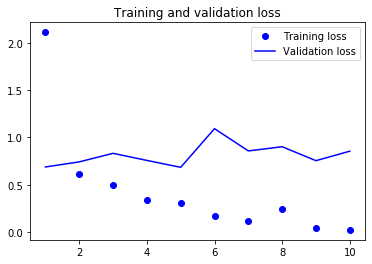

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  WITHOUT PREEMBEDDING

In [62]:

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 0.6958 - acc: 0.4850 - val_loss: 0.6926 - val_acc: 0.5091
Epoch 2/10
200/200 [==============================] - 1s 4ms/s

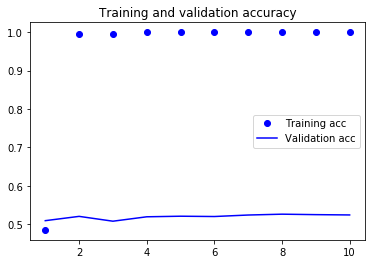

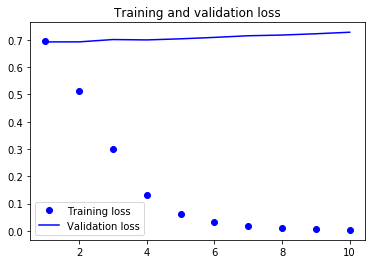

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

If we compare the both implementation the pretrained embedding it more powerfull than without it. This is because our dataset is reduced (we just take into acocunt the 100 most frequent words). 

## TEST 

In [65]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname) , encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [66]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 80us/step


[0.8651500610542298, 0.5550000071525574]

 BAD RESULTS !!!
 55%. This is because we use a few words to trained our model

# RECURRENT NEURAL NETWORKS

### FIRST NAIVE IMPLEMENTATION

In [67]:
from keras.layers import SimpleRNN

RNN in Keeras can run in two different modes

1) It can return all the output for each timestep for each input_sequence

2) It can return just the last result for each input_sequence


Indeed, in Keeras we pass in input batches of sequences, not just one sequence.

In [68]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### We can concatenate the different RNN to increase the representative power of our Network

In [69]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### PREPROCESSING THE DATA

In [70]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### TRAINING A SIMPLE RNN WITH AN EMBEDDING AND A DENSE LAYER

In [71]:

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.6208 - acc: 0.6334 - val_loss: 0.4458 - val_acc: 0.8100
Epoch 2/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.3910 - acc: 0.8351 - val_loss: 0.4742 - val_acc: 0.8026
Epoch 3/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.2946 - acc: 0.8813 - val_loss: 0.3849 - val_acc: 0.8484
Epoch 4/10
20000/20000 [==============================] - 90s 4ms/step - loss: 0.2128 - acc: 0.9200 - val_loss: 0.7923 - val_acc: 0.7640
Epoch 5/10
20000/20000 [==============================] - 102s 5ms/step - loss: 0.1548 - acc: 0.9446 - val_loss: 0.4085 - val_acc: 0.8334
Epoch 6/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.1018 - acc: 0.9657 - val_loss: 0.5534 - val_acc: 0.7638
Epoch 7/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.0712 - acc: 0.9777 - val_loss: 0.4745 - val_

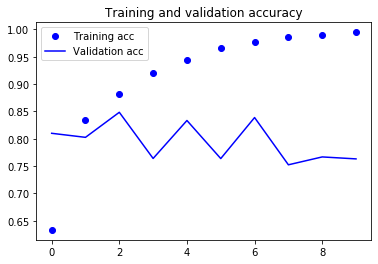

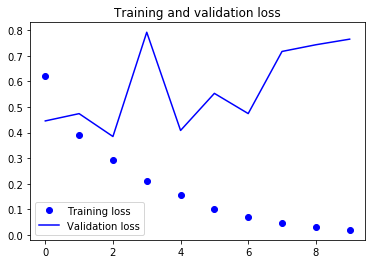

In [72]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Overfitting quickly, and the accuracy is limited to 80%


## LSTM IN KERAS

In [73]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 225s 11ms/step - loss: 0.5316 - acc: 0.7562 - val_loss: 0.3805 - val_acc: 0.8538
Epoch 2/10
20000/20000 [==============================] - 222s 11ms/step - loss: 0.3084 - acc: 0.8804 - val_loss: 0.3224 - val_acc: 0.8688
Epoch 3/10
20000/20000 [==============================] - 214s 11ms/step - loss: 0.2397 - acc: 0.9102 - val_loss: 0.3151 - val_acc: 0.8820
Epoch 4/10
20000/20000 [==============================] - 201s 10ms/step - loss: 0.2030 - acc: 0.9257 - val_loss: 0.2872 - val_acc: 0.8802
Epoch 5/10
20000/20000 [==============================] - 202s 10ms/step - loss: 0.1799 - acc: 0.9348 - val_loss: 0.3345 - val_acc: 0.8582
Epoch 6/10
20000/20000 [==============================] - 199s 10ms/step - loss: 0.1615 - acc: 0.9423 - val_loss: 0.3582 - val_acc: 0.8806
Epoch 7/10
20000/20000 [==============================] - 218s 11ms/step - loss: 0.1467 - acc: 0.9488 - val_loss: 0.3

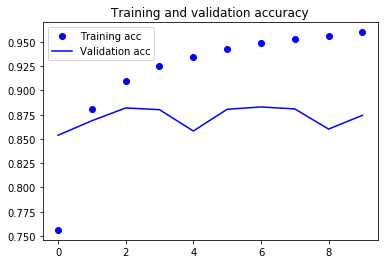

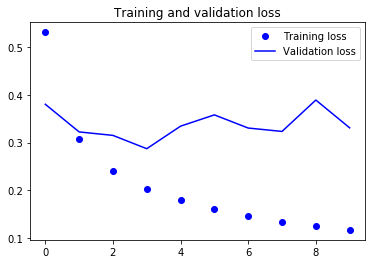

In [74]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()